In [22]:
import numpy as np
import pandas as pd
# import shap

print(np.__version__)

from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance
from matplotlib import pyplot as plt
import seaborn as sns # for correlation heatmap

from xgboost import XGBRegressor

1.21.2


In [23]:
sales = pd.read_csv('sales_ecommerce/summer-products-with-rating-and-performance_2020-08.csv')

In [24]:
sales.drop_duplicates()
sales.nunique()
sales.drop(['title_orig', 'currency_buyer', 'has_urgency_banner', 'product_url', 'product_picture', 'product_id'], axis = 1, inplace = True)

In [25]:
# sales.dropna().reset_index()
null_val = pd.DataFrame(sales.isnull().sum())
null_val.columns = ['null_val']
null_val['percent_'] = round(null_val['null_val'] / len(sales.index), 2) * 100
df = sales

In [33]:
# sales.drop(['title', 'tags', 'product_color', 'product_variation_size_id', 'shipping_option_name', 'urgency_text', 'merchant_title', 'merchant_name', 'merchant_info_subtitle','origin_country', 'merchant_profile_picture', 'merchant_id', 'theme', 'crawl_month'], axis = 1, inplace = True)
X = sales.loc[:, sales.columns != 'units_sold']
y = sales.units_sold
print(X.dtypes)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=12)

price                           float64
retail_price                      int64
uses_ad_boosts                    int64
rating                          float64
rating_count                      int64
rating_five_count               float64
rating_four_count               float64
rating_three_count              float64
rating_two_count                float64
rating_one_count                float64
badges_count                      int64
badge_local_product               int64
badge_product_quality             int64
badge_fast_shipping               int64
product_variation_inventory       int64
shipping_option_price             int64
shipping_is_express               int64
countries_shipped_to              int64
inventory_total                   int64
merchant_rating_count             int64
merchant_rating                 float64
merchant_has_profile_picture      int64
dtype: object


In [34]:
xgb = XGBRegressor(n_estimators=100)
xgb.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=16, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [35]:
xgb.feature_importances_

array([6.2048379e-03, 9.8961191e-03, 3.4277805e-03, 6.9756075e-03,
       1.4813539e-01, 1.6497586e-02, 6.5489411e-02, 6.3091117e-01,
       4.8956415e-03, 6.0699768e-03, 4.3739597e-03, 5.7871681e-02,
       4.5813540e-05, 0.0000000e+00, 2.3216971e-03, 6.3874070e-03,
       0.0000000e+00, 5.2351588e-03, 0.0000000e+00, 1.7524222e-02,
       3.9493311e-03, 3.7871648e-03], dtype=float32)

ValueError: shape mismatch: objects cannot be broadcast to a single shape

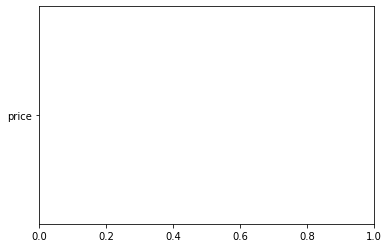

In [36]:
plt.barh(sales.columns, xgb.feature_importances_)